**STEP_1**

In [111]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**1(a)**

We download daily prices for ["SPY", "TLT", "SHY", "GLD", "DBO"] between 2018-01-01 to 2022-12-30 for testing and 2010-01-01 to 2017-12-31 for training and validation.

We will be using "Adjusted Close" for the prices to ensure consistency.




In [112]:


# Define the symbols for the 5 ETFs
symbols = ["SPY", "TLT", "SHY", "GLD", "DBO"]

# Define the start and end dates for the test sample period
start_date_test = "2018-01-01"
end_date_test = "2022-12-30"

# Download the data for each ETF
etf_data_test = yf.download(symbols, start=start_date_test, end=end_date_test)

# Print the head of each ETF's data
for symbol in symbols:
    print(f"Size of Test Data for {symbol}:")
    print(etf_data_test.shape)
    print()

# Define the start and end dates for the train sample period
start_date_train = "2010-01-01"
end_date_train = "2017-12-31"

# Download the data for each ETF
etf_data_train = yf.download(symbols, start=start_date_train, end=end_date_train)

# Print the head of each ETF's data
for symbol in symbols:
    print(f"Size of Train Data for {symbol}:")
    print(etf_data_train.shape)
    print()

[*********************100%***********************]  5 of 5 completed
Size of Test Data for SPY:
(1258, 30)

Size of Test Data for TLT:
(1258, 30)

Size of Test Data for SHY:
(1258, 30)

Size of Test Data for GLD:
(1258, 30)

Size of Test Data for DBO:
(1258, 30)

[*********************100%***********************]  5 of 5 completed
Size of Train Data for SPY:
(2013, 30)

Size of Train Data for TLT:
(2013, 30)

Size of Train Data for SHY:
(2013, 30)

Size of Train Data for GLD:
(2013, 30)

Size of Train Data for DBO:
(2013, 30)



**1(b)**

Here we evaluate stationary of the log return.

Summary Statistics for Prices:
               DBO          GLD          SHY          SPY          TLT
count  2013.000000  2013.000000  2013.000000  2013.000000  2013.000000
mean     19.866224   130.406284    76.461697   148.316465    93.053119
std       8.268948    19.304866     1.132779    43.707799    15.174869
min       6.538252   100.500000    73.340553    79.874107    62.060913
25%       9.336240   116.940002    75.952614   106.352577    83.922066
50%      24.191532   123.389999    76.408318   151.392288    94.305428
75%      26.604918   142.639999    77.411003   181.209747   104.970551
max      32.941246   184.589996    78.350502   244.399323   123.215485

Summary Statistics for Daily Returns:
               DBO          GLD          SHY          SPY          TLT
count  2012.000000  2012.000000  2012.000000  2012.000000  2012.000000
mean     -0.000506     0.000059     0.000030     0.000506     0.000290
std       0.017450     0.010400     0.000545     0.009230     0.009081
min    

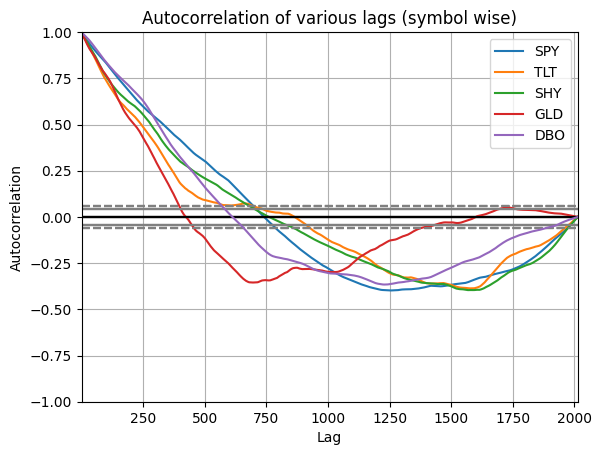

In [113]:
# Calculate summary statistics for prices
etf_prices = etf_data_train['Adj Close']
price_stats = etf_prices.describe()
print("Summary Statistics for Prices:")
print(price_stats)

# Calculate summary statistics for daily returns
#etf_returns = etf_prices.pct_change().dropna()
etf_returns = np.log(etf_prices/ etf_prices.shift(1)).dropna()
return_stats = etf_returns.describe()
print("\nSummary Statistics for Daily Returns:")
print(return_stats)

# Calculate autocorrelation and partial autocorrelation
for s in symbols:
  autocorr = pd.plotting.autocorrelation_plot(etf_prices[s], label=s)
plt.title('Autocorrelation of various lags (symbol wise)')
plt.show()


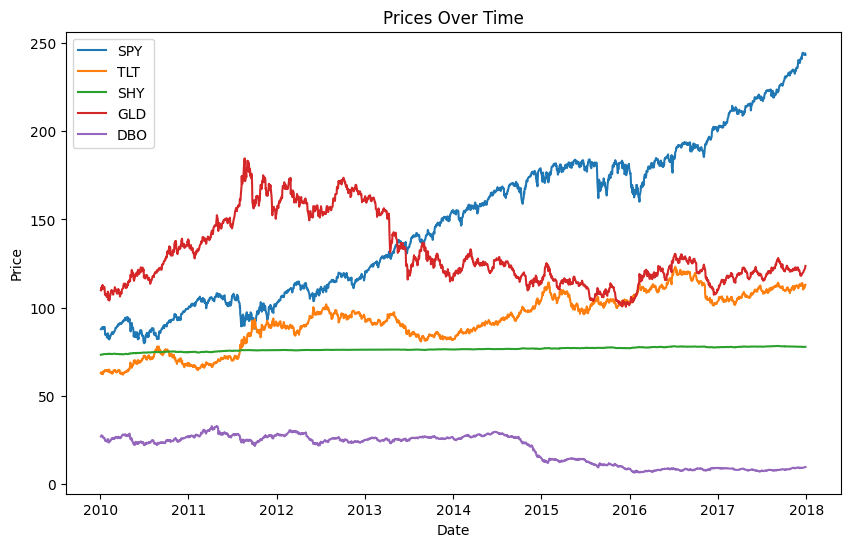

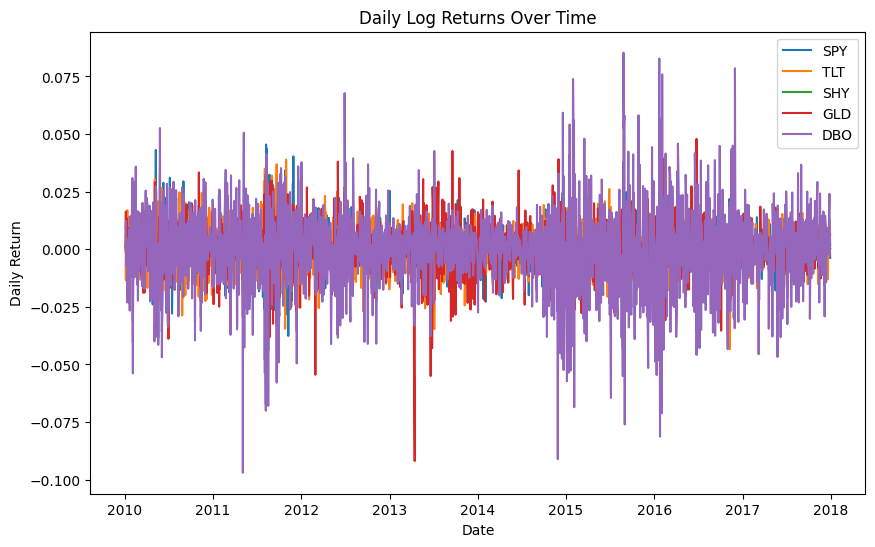

In [114]:
import matplotlib.pyplot as plt

# Visualize prices over time
plt.figure(figsize=(10, 6))
for symbol in symbols:
    plt.plot(etf_prices[symbol], label=symbol)
plt.title("Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# Visualize returns over time
plt.figure(figsize=(10, 6))
for symbol in symbols:
    plt.plot(etf_returns[symbol], label=symbol)
plt.title("Daily Log Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.show()

# # Visualize returns distribution
# fig, axes = plt.subplots(5,1, figsize=(10,30))
# for idx, symbol in enumerate(symbols):
#     axes[idx].plot(etf_returns[symbol], label=symbol)
#     axes[idx].set_xlabel(f'Date')
#     axes[idx].set_ylabel('Daily Return')
#     axes[idx].set_title('Daily Log returns Over time for '+str(symbol))
# fig.suptitle("Daily Log Returns Over Time")
# plt.show()

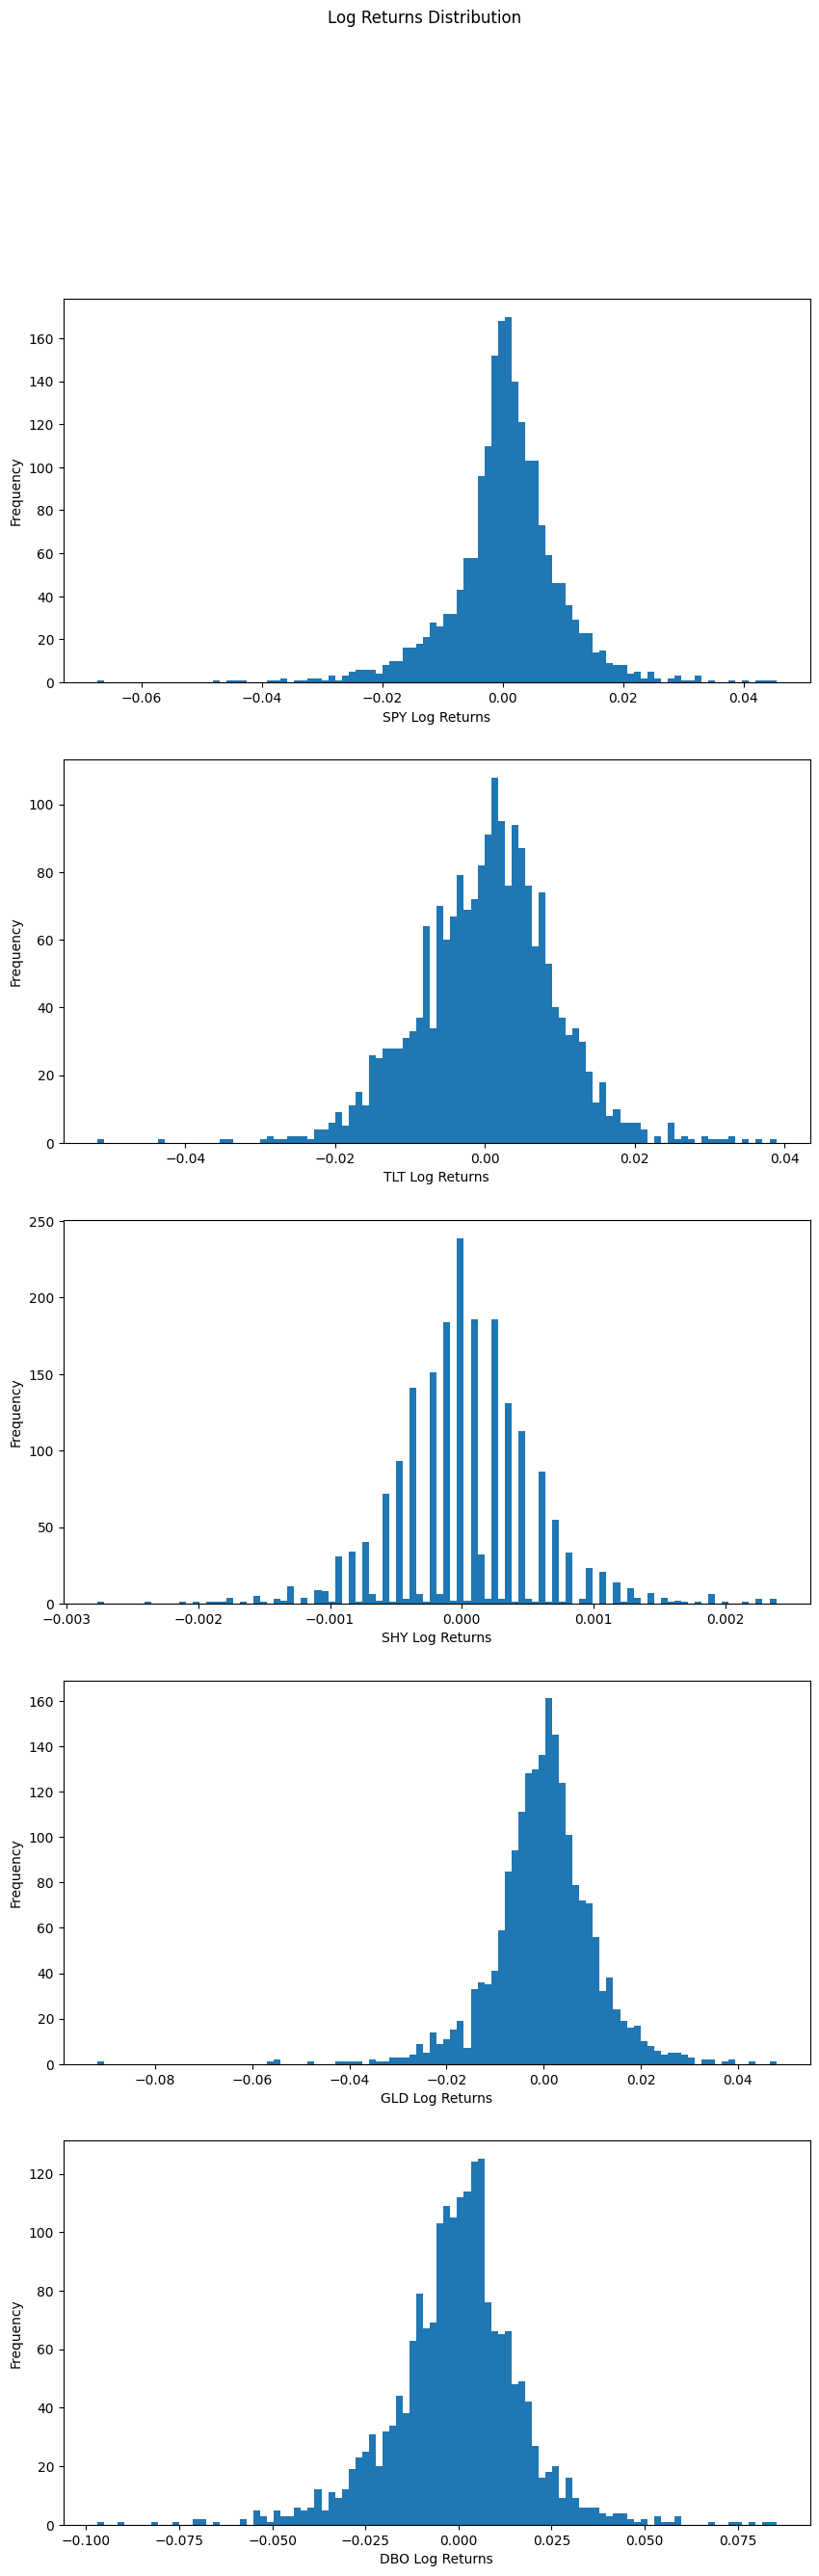

In [115]:
# Visualize returns distribution
fig, axes = plt.subplots(5,1, figsize=(10,30))
for idx, symbol in enumerate(symbols):
    axes[idx].hist(etf_returns[symbol], bins=100, label=symbol)
    axes[idx].set_xlabel(f'{symbol} Log Returns')
    axes[idx].set_ylabel('Frequency')
fig.suptitle("Log Returns Distribution")
plt.show()

In [116]:
from statsmodels.tsa.stattools import adfuller

# Check stationarity of returns using ADF test
for symbol in symbols:
    result = adfuller(etf_returns[symbol])
    print(f"\nADF Test for {symbol}:")
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value}")



ADF Test for SPY:
ADF Statistic: -10.257590815864265
p-value: 4.320331903050527e-18
Critical Values:
	1%: -3.4336469649065298
	5%: -2.862996415949189
	10%: -2.5675453345421984

ADF Test for TLT:
ADF Statistic: -18.931518887363893
p-value: 0.0
Critical Values:
	1%: -3.4336156817103016
	5%: -2.862982604329594
	10%: -2.567537980547385

ADF Test for SHY:
ADF Statistic: -20.504964804347498
p-value: 0.0
Critical Values:
	1%: -3.4336124232421144
	5%: -2.8629811656983755
	10%: -2.5675372145497732

ADF Test for GLD:
ADF Statistic: -46.17313587026081
p-value: 0.0
Critical Values:
	1%: -3.433605925774539
	5%: -2.862978297026843
	10%: -2.5675356871295394

ADF Test for DBO:
ADF Statistic: -26.80365572205662
p-value: 0.0
Critical Values:
	1%: -3.4336091712699957
	5%: -2.862979729933645
	10%: -2.567536450078678


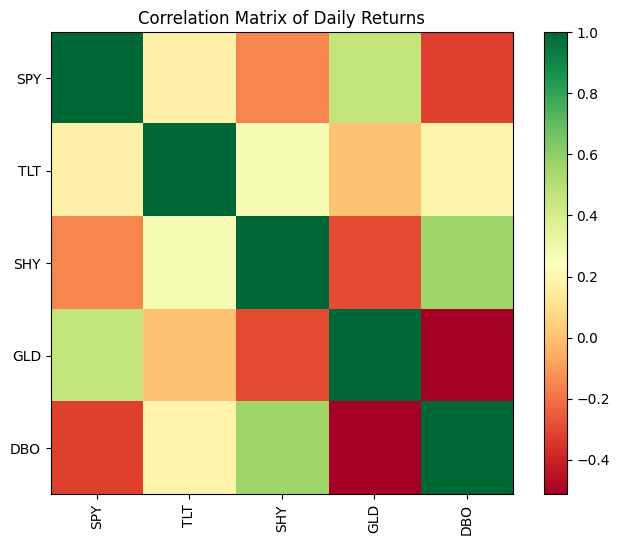

In [117]:
# Calculate correlations between daily returns
return_corr = etf_returns.corr()

# Plot correlation matrix
plt.figure(figsize=(8, 6))
plt.imshow(return_corr, cmap='RdYlGn', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(symbols)), symbols, rotation='vertical')
plt.yticks(range(len(symbols)), symbols)
plt.title("Correlation Matrix of Daily Returns")
plt.show()


**STEP_2**

In [118]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [119]:
import pandas as pd

# Select the returns for one asset class (e.g., SPY)
asset_returns = etf_returns['SPY']

# Define the number of lagged returns to use as input
n_lags = 10

# Create lagged returns as input features
X = pd.DataFrame()
for i in range(n_lags):
    X[f"Lag_{i+1}"] = asset_returns.shift(i+1)

# Remove rows with missing values (due to shifting)
X = X.dropna()

# Target variable: 25-day ahead return
y = asset_returns.shift(-25).dropna()

# Align indices of X and y
X = X.iloc[:-25]  # Exclude the last 25 rows from X
y = y.iloc[:-25]  # Exclude the last 25 rows from y

# Split the data into training and test sets
split_index = int(len(X) * 0.8)  # 80% for training, 20% for testing
X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1581, 10)
(396, 10)
(1581,)
(381,)


In [120]:
# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


print(X_train_scaled.shape)
print(X_test_scaled.shape)


(1581, 10)
(396, 10)


In [121]:
# Initialize the model
model = Sequential()

# Add LSTM layers
model.add(LSTM(64, input_shape=(n_lags, 1), return_sequences=True))
model.add(LSTM(32))

# Add a dense output layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Print the model summary
model.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 10, 64)            16896     
                                                                 
 lstm_25 (LSTM)              (None, 32)                12416     
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


In [122]:
# Reshape the input data to match the expected shape of the LSTM model
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], n_lags, 1))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], n_lags, 1))

# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, verbose=1)


Epoch 1/10
50/50 [==============================] - 3s 9ms/step - loss: 2.1092e-04
Epoch 2/10
50/50 [==============================] - 0s 10ms/step - loss: 1.0537e-04
Epoch 3/10
50/50 [==============================] - 0s 10ms/step - loss: 1.0547e-04
Epoch 4/10
50/50 [==============================] - 1s 13ms/step - loss: 1.0466e-04
Epoch 5/10
50/50 [==============================] - 1s 11ms/step - loss: 1.1039e-04
Epoch 6/10
50/50 [==============================] - 1s 12ms/step - loss: 1.0558e-04
Epoch 7/10
50/50 [==============================] - 1s 10ms/step - loss: 1.0678e-04
Epoch 8/10
50/50 [==============================] - 0s 9ms/step - loss: 1.0241e-04
Epoch 9/10
50/50 [==============================] - 0s 9ms/step - loss: 1.0422e-04
Epoch 10/10
50/50 [==============================] - 0s 9ms/step - loss: 1.0334e-04


In [123]:

# Define the number of lagged returns to use as input
n_lags = 10

# Function to prepare the data for a specific asset class
def prepare_data(asset_returns):
    # Create lagged returns as input features
    X = pd.DataFrame()
    for i in range(n_lags):
        X[f"Lag_{i+1}"] = asset_returns.shift(i+1)

    # Remove rows with missing values (due to shifting)
    X = X.dropna()

    # Target variable: 25-day ahead return
    y = asset_returns.shift(-25).dropna()

    # Align indices of X and y
    X = X.iloc[:-15]  # Exclude the last 25 rows from X
    # y = y.iloc[:-25]  # Exclude the last 25 rows from y
    # print(X.shape,y.shape)
    # Split the data into training and test sets
    split_index = int(len(X) * 0.8)  # 80% for training, 20% for testing
    X_train = X.iloc[:split_index]
    X_test = X.iloc[split_index:]
    y_train = y.iloc[:split_index]
    y_test = y.iloc[split_index:]
    # print(X_train.shape)
    # print(X_test.shape)
    # print(y_train.shape)
    # print(y_test.shape)

    # Split the data into training and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Scale the features using MinMaxScaler
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Reshape the input data to match the expected shape of the LSTM model
    X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], n_lags, 1))
    X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], n_lags, 1))

    return X_train_reshaped, X_test_reshaped, y_train, y_test

# Create a dictionary to store the models for each asset class
models = {}

# Loop through each asset class and create the corresponding LSTM model
for symbol in symbols:
    print("symbol="+symbol)
    asset_returns = etf_returns[symbol]
    X_train, X_test, y_train, y_test = prepare_data(asset_returns)

    # Initialize the model
    model = Sequential()

    # Add LSTM layers
    model.add(LSTM(64, input_shape=(n_lags, 1), return_sequences=True))
    model.add(LSTM(32))

    # Add a dense output layer
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

    # Evaluate the model on the test set
    loss = model.evaluate(X_test[:], y_test, verbose=0)
    print(f"Test Loss for {symbol}: {loss}")

    # Store the model in the dictionary
    models[symbol] = model


symbol=SPY
Epoch 1/10
50/50 [==============================] - 3s 9ms/step - loss: 0.0017
Epoch 2/10
50/50 [==============================] - 0s 9ms/step - loss: 1.0786e-04
Epoch 3/10
50/50 [==============================] - 0s 8ms/step - loss: 1.0258e-04
Epoch 4/10
50/50 [==============================] - 0s 10ms/step - loss: 1.0194e-04
Epoch 5/10
50/50 [==============================] - 0s 9ms/step - loss: 1.0454e-04
Epoch 6/10
50/50 [==============================] - 0s 9ms/step - loss: 1.0365e-04
Epoch 7/10
50/50 [==============================] - 0s 9ms/step - loss: 1.0290e-04
Epoch 8/10
50/50 [==============================] - 0s 8ms/step - loss: 1.0313e-04
Epoch 9/10
50/50 [==============================] - 0s 8ms/step - loss: 1.0311e-04
Epoch 10/10
50/50 [==============================] - 0s 9ms/step - loss: 1.0331e-04
Test Loss for SPY: 3.0385492209461518e-05
symbol=TLT
Epoch 1/10
50/50 [==============================] - 3s 9ms/step - loss: 1.7399e-04
Epoch 2/10
50/50 [=======

In [124]:
X_test.shape, y_test.shape

((398, 10, 1), (398,))

**2(b)**

In [125]:
# Create a dictionary to store the models and their in-sample performance
model_performance = {}

# Loop through each asset class and train the corresponding model
for symbol in symbols:
    asset_returns = etf_returns[symbol]
    X_train, X_test, y_train, y_test = prepare_data(asset_returns)

    # Initialize the model
    model = Sequential()
    model.add(LSTM(64, input_shape=(n_lags, 1), return_sequences=True))
    model.add(LSTM(32))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Evaluate the model on the training set
    train_loss = model.evaluate(X_train, y_train, verbose=0)

    # Store the model and its in-sample performance in the dictionary
    model_performance[symbol] = {"model": model, "train_loss": train_loss}

    # Print the in-sample performance of the model
    print(f"In-sample Loss for {symbol}: {train_loss}")


In-sample Loss for SPY: 0.00010852130071725696
In-sample Loss for TLT: 0.00010634744103299454
In-sample Loss for SHY: 3.242032278194529e-07
In-sample Loss for GLD: 0.0001202965431730263
In-sample Loss for DBO: 0.00031741303973831236


**2(c)**

In [126]:
# Create a dictionary to store the out-of-sample performance of the models
out_of_sample_performance = {}

# Loop through each asset class and test the corresponding model
for symbol in symbols:
    asset_returns = etf_returns[symbol]
    X_train, X_test, y_train, y_test = prepare_data(asset_returns)
    model = model_performance[symbol]["model"]

    # Evaluate the model on the test set
    test_loss = model.evaluate(X_test[:], y_test, verbose=0)

    # Store the out-of-sample performance in the dictionary
    out_of_sample_performance[symbol] = test_loss

    # Print the out-of-sample performance of the model
    print(f"Out-of-sample Loss for {symbol}: {test_loss}")


Out-of-sample Loss for SPY: 3.804467269219458e-05
Out-of-sample Loss for TLT: 6.337196828098968e-05
Out-of-sample Loss for SHY: 3.63334294206652e-07
Out-of-sample Loss for GLD: 5.710348341381177e-05
Out-of-sample Loss for DBO: 0.0002872911572922021


**2(d)**

In [127]:
# Create a dictionary to store the asset class predictions
predictions = {}
prediction_index={}
actual_values={}
# Loop through each asset class and get the predictions
for symbol in symbols:
    model = model_performance[symbol]["model"]
    X_train, X_test, _, _ = prepare_data(etf_returns[symbol])
    predictions[symbol] = model.predict(X_test).ravel()
    # print(X_test)
    actual_values[symbol]=X_test.flatten()
    df_to_generate_index=etf_returns[symbol].shift(-25).dropna()
    split_index = int(len(df_to_generate_index) * 0.8)
    df_to_generate_index= df_to_generate_index.iloc[split_index:]
    prediction_index[symbol] = df_to_generate_index.index
# print(actual_values)
# print(predictions)
# Create a DataFrame to store the predictions
predictions_df = pd.DataFrame(predictions,index=prediction_index['SPY'])
actual_values_df= pd.DataFrame(actual_values)
# Define the number of asset classes to select for long and short positions
n_long = 2
n_short = 2

# Calculate the average return for each asset class over the prediction horizon
avg_returns = predictions_df.mean(axis=0)

# Sort the asset classes based on average returns
sorted_assets = avg_returns.sort_values(ascending=False)

# Get the top performing asset classes for a long position
long_positions = sorted_assets[:n_long]

# Get the bottom performing asset classes for a short position
short_positions = sorted_assets[-n_short:]

# Rebalance the portfolio every 25 days
portfolio = pd.DataFrame(index=long_positions.index.union(short_positions.index))

# Create a function to calculate the portfolio weights
def calculate_weights():
    weights = pd.Series(0, index=portfolio.index)
    weights[long_positions.index] = 1 / n_long
    weights[short_positions.index] = -1 / n_short
    return weights

portfolio_returns = pd.DataFrame(index=prediction_index['SPY'], columns=["Portfolio Returns"])
for i in range(len(predictions_df)):
    weights = calculate_weights()
    portfolio_returns.iloc[i] = (weights * predictions_df.iloc[i]).sum()


# Print the portfolio returns
print(portfolio_returns)


13/13 [==============================] - 1s 2ms/step
           Portfolio Returns
Date                        
2016-04-28           0.00565
2016-04-29          0.005598
2016-05-02           0.00571
2016-05-03          0.005562
2016-05-04          0.005358
...                      ...
2017-11-16          0.005291
2017-11-17          0.005413
2017-11-20          0.005538
2017-11-21          0.005477
2017-11-22          0.005593

[398 rows x 1 columns]


**2(e)**

(398, 1)
<bound method NDFrame.head of            Portfolio Returns
Date                        
2016-04-28           0.00565
2016-04-29           0.01128
2016-05-02          0.017054
2016-05-03          0.022711
2016-05-04          0.028191
...                      ...
2017-11-16          7.981574
2017-11-17          8.030187
2017-11-20          8.080193
2017-11-21          8.129922
2017-11-22          8.180987

[398 rows x 1 columns]>
(2012,)
<bound method NDFrame.head of Date
2010-01-05    0.003717
2010-01-06    0.006914
2010-01-07    0.005404
2010-01-08    0.008141
2010-01-11    0.008936
                ...   
2017-12-22    0.139040
2017-12-26    0.145551
2017-12-27    0.148491
2017-12-28    0.151151
2017-12-29    0.152451
Length: 2012, dtype: float64>


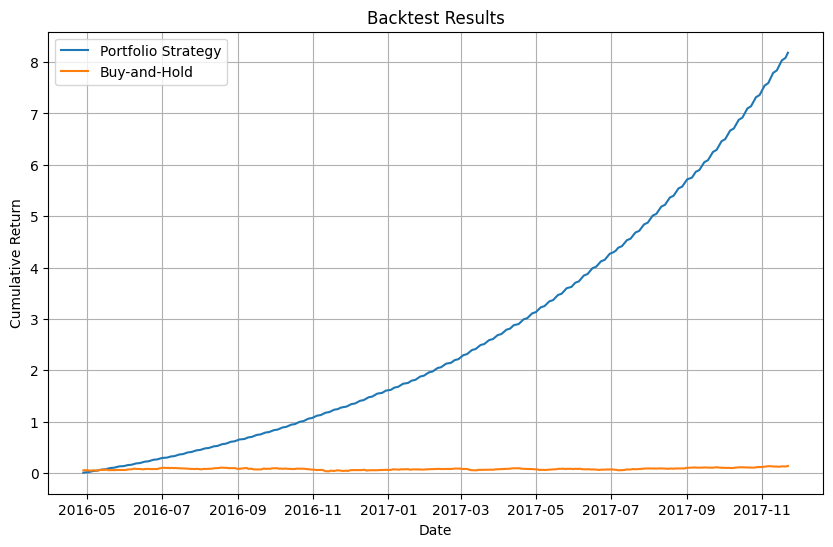

In [128]:
# Calculate the cumulative returns for the portfolio strategy
portfolio_returns_cumulative = (portfolio_returns + 1).cumprod() - 1
# portfolio_returns_cumulative = (portfolio_returns).cumsum()
print(portfolio_returns_cumulative.shape)
print(portfolio_returns_cumulative.head)
# Calculate the buy-and-hold return for an equally weighted portfolio
equal_weights = pd.Series(1 / len(symbols), index=symbols)
buy_and_hold_returns = (equal_weights * etf_returns[symbols]).sum(axis=1).cumsum()
print(buy_and_hold_returns.shape)
print(buy_and_hold_returns.head)
buy_and_hold_returns=buy_and_hold_returns[portfolio_returns_cumulative.index]
# Plot the cumulative returns for the portfolio strategy and buy-and-hold approach
plt.figure(figsize=(10, 6))
plt.plot(portfolio_returns_cumulative, label='Portfolio Strategy')
plt.plot(buy_and_hold_returns, label='Buy-and-Hold')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Backtest Results')
plt.legend()
plt.grid(True)
plt.show()


**STEP_3**

In [130]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers, models

class Predictor:
    def __init__(self, symbols, n_steps=50, n_predict=25):
        self.symbols = symbols
        self.n_steps = n_steps
        self.n_predict = n_predict
        self.scaler = MinMaxScaler(feature_range=(0, 1))
        self.model = self._build_model()

    def _build_model(self):
        model = models.Sequential()
        model.add(layers.LSTM(units=64, return_sequences=True, input_shape=(self.n_steps, len(self.symbols))))
        model.add(layers.LSTM(units=64, return_sequences=False))
        model.add(layers.Dense(units=len(self.symbols)))
        model.compile(optimizer='adam', loss='mean_squared_error')
        return model

    def train(self, prices, epochs=10, batch_size=25):
        scaled = self.scaler.fit_transform(prices)
        X, y = self.create_lstm_inputs(scaled, self.n_steps, self.n_predict)
        print('training X,y', X.shape, y.shape)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
        print(X_train.shape, y_train.shape)
        self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)
        train_loss = self.model.evaluate(X_train, y_train, verbose=0)
        test_loss = self.model.evaluate(X_test, y_test, verbose=0)
        print('train_loss', train_loss)
        print('test_loss', test_loss)

    def predict(self, prices):
        scaled = self.scaler.fit_transform(prices)
        X, _ = self.create_lstm_inputs(scaled, self.n_steps, 0)
        print('predicting prices', prices.shape)
        print('predicting X', X.shape)
        predictions = self.model.predict(X)
        return self.scaler.inverse_transform(predictions)

    def create_lstm_inputs(self, data, n_steps, n_predict):
        X, y = [], []
        for i in range(len(data) - n_steps - n_predict):
            X.append(data[i:i + n_steps, :])
            y.append(data[i + n_steps + n_predict, :])
        return np.array(X), np.array(y)

class Backtest:
    def __init__(self, symbols, train_start='2018-01-01', train_end='2021-12-31', trade_start='2022-01-01', trade_end='2022-12-31', initial_capital=1000*1000):
        self.symbols = symbols
        self.train_start = train_start
        self.train_end = train_end
        self.trade_start = trade_start
        self.trade_end = trade_end
        self.initial_capital = initial_capital
        self.cash = []
        self.holdings = []
        self.values = []
        self.predictor = Predictor(self.symbols)
        self.train_data = yf.download(self.symbols, start=train_start, end=train_end)
        self.trade_data = yf.download(self.symbols, start=trade_start, end=trade_end)

    def run(self, rebalance_frequency=25):
        ''' We do not re-train model during trading period'''
        self.reset()
        self.inital_train()

        prices = self.trade_data['Adj Close'].values
        allocations = self.get_allocations(prices)
        prices = prices[self.predictor.n_steps:]

        for i in range(0, len(allocations), rebalance_frequency):
            self.rebalance(prices[i], allocations[i])

        final_holdings = self.holdings[-1]
        final_holding_values = (prices[-1] * final_holdings)
        final_cash = self.cash[-1]
        final_value = final_cash + final_holding_values.sum()
        total_return = np.log(final_value / self.initial_capital)
        print('final_cash', final_cash, 'final_holdings', final_holdings, 'final_holding_values', final_holding_values, 'total', final_value)
        print('total_return', total_return)
        print('Buy and Hold would yield the following return')
        print(np.log(backtest.trade_data['Adj Close'].iloc[-1] / backtest.trade_data['Adj Close'].iloc[0]))
        return total_return

    def reset(self):
        self.holdings = np.zeros(shape=(1, len(self.symbols)))
        self.cash = np.array([self.initial_capital])

    def inital_train(self):
        self.predictor.train(self.train_data['Adj Close'].values)

    def get_allocations(self, prices):
        ''' Propotionally allocate based on predicted returns '''
        predictions = self.get_predictions()
        current_prices = self.trade_data['Adj Close'].values
        current_prices = current_prices[self.predictor.n_steps:]
        predicted_log_returns = np.log(predictions / current_prices)
        predicted_log_returns[predicted_log_returns < 0] = 0
        allocations = predicted_log_returns / predicted_log_returns.sum(axis=1).reshape(-1,1)
        return allocations

    def get_predictions(self):
        return self.predictor.predict(self.trade_data['Adj Close'].values)

    def rebalance(self, prices, allocations):
        portfolio_value = self.cash[-1] + (prices * self.holdings[-1]).sum()
        new_allocation_value = portfolio_value * allocations
        new_holding = new_allocation_value / prices
        new_cash = portfolio_value - new_allocation_value.sum()

        self.cash = np.r_[self.cash, new_cash]
        self.holdings = np.r_[self.holdings, [new_holding]]

        print('portfolio_value', portfolio_value, 'new_holding', new_holding, 'new_cash', new_cash)

backtest = Backtest(symbols=["SPY", "TLT", "SHY", "GLD", "DBO"])
backtest.run()

'''
We use LSTM to forecast actual stock price 25 trading days into the future. Then we use this forecast to determine portfolio allocations.
First, we train LSTM model using data between 2018-2021. Then we start trading in 2022. During trading, we do not re-train the model.

Our allocation strategy is proportional to the forecast gain in the next 25 trading days while negative forecast will receive zero allocation.
We will try to fully deploy all cash whenever possible. So, this is a long-only strategy.

Our rebalance strategy is every 25 days. This means every 25 trading days, we look at our forecast and determine allocations.

Note that our backtest is simplied quite a bit by ignoring slippage, fee and utilize the same closing price for that day to determine current portfolio value and calculate number of shares based on new allocation.

In the future, we will want to incorporate negative allocation; that is short selling asset classes. We will then try long-short strategy.
'''

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
training X,y (932, 50, 5) (932, 5)
(745, 50, 5) (745, 5)
Epoch 1/10
30/30 [==============================] - 4s 41ms/step - loss: 0.0467
Epoch 2/10
30/30 [==============================] - 1s 42ms/step - loss: 0.0085
Epoch 3/10
30/30 [==============================] - 1s 42ms/step - loss: 0.0071
Epoch 4/10
30/30 [==============================] - 1s 42ms/step - loss: 0.0065
Epoch 5/10
30/30 [==============================] - 1s 42ms/step - loss: 0.0058
Epoch 6/10
30/30 [==============================] - 2s 51ms/step - loss: 0.0054
Epoch 7/10
30/30 [==============================] - 1s 48ms/step - loss: 0.0048
Epoch 8/10
30/30 [==============================] - 1s 41ms/step - loss: 0.0049
Epoch 9/10
30/30 [==============================] - 1s 41ms/step - loss: 0.0036
Epoch 10/10
30/30 [==============================] - 1s 41ms/step - loss: 0.0029
trai

'\nWe use LSTM to forecast actual stock price 25 trading days into the future. Then we use this forecast to determine portfolio allocations.\nFirst, we train LSTM model using data between 2018-2021. Then we start trading in 2022. During trading, we do not re-train the model.\n\nOur allocation strategy is proportional to the forecast gain in the next 25 trading days while negative forecast will receive zero allocation.\nWe will try to fully deploy all cash whenever possible. So, this is a long-only strategy.\n\nOur rebalance strategy is every 25 days. This means every 25 trading days, we look at our forecast and determine allocations.\n\nNote that our backtest is simplied quite a bit by ignoring slippage, fee and utilize the same closing price for that day to determine current portfolio value and calculate number of shares based on new allocation.\n\nIn the future, we will want to incorporate negative allocation; that is short selling asset classes. We will then try long-short strategy.

STEP 4

Comparison Analysis of the models


In multi-classes model, we can see model evaluation result in STEP 3 as follow:

train_loss 0.003718577791005373
test_loss 0.023464126512408257

This shows that trained loss was 0.003 while loss from test data was 0.02, which was significantly higher. Thus, the model is noticably less performant with out-of-sample data.

Using this model, however, still generate positive return in our trading strategy, at around 4-11%. Actual returns will probably be lower when slippage and fee are taking into account. The returns fluctuate as the model accuracy changes in each training.

However, if we consider buy-and-hold strategy for these 5 assets, our model and trading strategy has done quite well since 3 of 5 assets has negative return, GLD was virtually flat, while DBO gained 10%. Our portfolio gained upto 11% total.

We have not yet tried with shorting asset class, which should give us even higher return.

DBO    0.108640
GLD    0.007752
SHY   -0.038404
SPY   -0.206365
TLT   -0.347868

Our Portfolio is up 11%
